In [1]:
%matplotlib inline

import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from models.WGAN import WGAN
from utils.loaders import load_cifar

In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0002'
DATA_NAME = 'airplane'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [3]:
if DATA_NAME == 'airplane':
    label = 0
elif DATA_NAME == 'horses':
    label = 7
(x_train, y_train) = load_cifar(label, 10)

In [4]:
print(tf.keras.backend.int_shape(x_train))
#print(tf.shape(x_train))

(6000, 32, 32, 3)


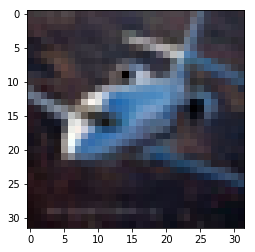

In [7]:
plt.imshow((x_train[150,:,:,:]+1)/2) # [-1,1] to [0,1]

In [6]:
if mode == 'build':

    gan = WGAN(input_dim = (32,32,3)
            , critic_conv_filters = [32,64,128,128]
            , critic_conv_kernel_size = [5,5,5,5]
            , critic_conv_strides = [2,2,2,1]
            , critic_batch_norm_momentum = None
            , critic_activation = 'leaky_relu'
            , critic_dropout_rate = None
            , critic_learning_rate = 0.00005
            , generator_initial_dense_layer_size = (4,4,128)
            , generator_upsample = [2,2,2,1]
            , generator_conv_filters = [128,64,32,3]
            , generator_conv_kernel_size = [5,5,5,5]
            , generator_conv_strides = [1,1,1,1]
            , generator_batch_norm_momentum = 0.8
            , generator_activation = 'leaky_relu'
            , generator_dropout_rate = None
            , generator_learning_rate = 0.00005
            , optimiser = 'rmsprop'
            , z_dim = 100
            )
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [7]:
gan.critic.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 32)        2432      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16, 16, 32)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 64)          51264     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 4, 4, 128)         0     

In [8]:
gan.generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              206848    
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 2048)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 128)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 128)         0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 8, 8, 128)         4097

In [9]:
BATCH_SIZE = 128
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
CLIP_THRESHOLD = 0.01

In [10]:
%%time
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , clip_threshold = CLIP_THRESHOLD
)

0 [D loss: (-0.000)(R -0.001, F 0.000)]  [G loss: -0.000] 
1 [D loss: (-0.001)(R -0.001, F 0.000)]  [G loss: -0.001] 
2 [D loss: (-0.002)(R -0.004, F 0.001)]  [G loss: -0.004] 
3 [D loss: (-0.006)(R -0.015, F 0.003)]  [G loss: -0.015] 
4 [D loss: (-0.013)(R -0.038, F 0.012)]  [G loss: -0.041] 
5 [D loss: (-0.020)(R -0.068, F 0.028)]  [G loss: -0.079] 
6 [D loss: (-0.025)(R -0.102, F 0.051)]  [G loss: -0.128] 
7 [D loss: (-0.020)(R -0.123, F 0.083)]  [G loss: -0.165] 
8 [D loss: (-0.016)(R -0.143, F 0.111)]  [G loss: -0.179] 
9 [D loss: (-0.015)(R -0.153, F 0.123)]  [G loss: -0.178] 
10 [D loss: (-0.013)(R -0.151, F 0.124)]  [G loss: -0.161] 
11 [D loss: (-0.016)(R -0.146, F 0.114)]  [G loss: -0.133] 
12 [D loss: (-0.014)(R -0.131, F 0.102)]  [G loss: -0.108] 
13 [D loss: (-0.025)(R -0.137, F 0.088)]  [G loss: -0.089] 
14 [D loss: (-0.019)(R -0.123, F 0.085)]  [G loss: -0.074] 
15 [D loss: (-0.015)(R -0.114, F 0.084)]  [G loss: -0.074] 
16 [D loss: (-0.011)(R -0.114, F 0.092)]  [G loss:

138 [D loss: (-0.016)(R -0.000, F -0.032)]  [G loss: 0.036] 
139 [D loss: (-0.008)(R 0.000, F -0.016)]  [G loss: 0.025] 
140 [D loss: (-0.001)(R -0.003, F 0.001)]  [G loss: 0.030] 
141 [D loss: (-0.004)(R 0.008, F -0.015)]  [G loss: 0.048] 
142 [D loss: (-0.000)(R 0.016, F -0.017)]  [G loss: 0.036] 
143 [D loss: (-0.004)(R -0.003, F -0.006)]  [G loss: 0.018] 
144 [D loss: (-0.003)(R -0.004, F -0.002)]  [G loss: 0.009] 
145 [D loss: (-0.018)(R -0.029, F -0.008)]  [G loss: -0.001] 
146 [D loss: (-0.023)(R -0.051, F 0.005)]  [G loss: -0.013] 
147 [D loss: (0.005)(R -0.028, F 0.037)]  [G loss: -0.011] 
148 [D loss: (0.001)(R -0.025, F 0.026)]  [G loss: 0.005] 
149 [D loss: (-0.010)(R -0.029, F 0.010)]  [G loss: 0.002] 
150 [D loss: (-0.015)(R -0.039, F 0.009)]  [G loss: 0.011] 
151 [D loss: (-0.012)(R -0.022, F -0.002)]  [G loss: 0.018] 
152 [D loss: (-0.040)(R -0.025, F -0.056)]  [G loss: 0.050] 
153 [D loss: (-0.020)(R -0.000, F -0.039)]  [G loss: 0.057] 
154 [D loss: (-0.012)(R -0.009, 

273 [D loss: (-0.001)(R -0.056, F 0.054)]  [G loss: -0.043] 
274 [D loss: (-0.005)(R -0.066, F 0.057)]  [G loss: -0.041] 
275 [D loss: (-0.001)(R -0.055, F 0.054)]  [G loss: -0.039] 
276 [D loss: (-0.004)(R -0.054, F 0.046)]  [G loss: -0.035] 
277 [D loss: (-0.003)(R -0.050, F 0.045)]  [G loss: -0.031] 
278 [D loss: (-0.004)(R -0.049, F 0.042)]  [G loss: -0.031] 
279 [D loss: (-0.006)(R -0.050, F 0.038)]  [G loss: -0.030] 
280 [D loss: (-0.008)(R -0.051, F 0.036)]  [G loss: -0.022] 
281 [D loss: (-0.007)(R -0.048, F 0.035)]  [G loss: -0.021] 
282 [D loss: (-0.009)(R -0.050, F 0.032)]  [G loss: -0.024] 
283 [D loss: (-0.008)(R -0.052, F 0.036)]  [G loss: -0.027] 
284 [D loss: (-0.007)(R -0.052, F 0.039)]  [G loss: -0.026] 
285 [D loss: (-0.010)(R -0.055, F 0.035)]  [G loss: -0.021] 
286 [D loss: (-0.009)(R -0.052, F 0.034)]  [G loss: -0.026] 
287 [D loss: (-0.007)(R -0.051, F 0.037)]  [G loss: -0.024] 
288 [D loss: (-0.010)(R -0.054, F 0.035)]  [G loss: -0.025] 
289 [D loss: (-0.009)(R 

408 [D loss: (-0.017)(R -0.125, F 0.091)]  [G loss: -0.065] 
409 [D loss: (-0.014)(R -0.113, F 0.086)]  [G loss: -0.065] 
410 [D loss: (-0.020)(R -0.128, F 0.088)]  [G loss: -0.082] 
411 [D loss: (-0.021)(R -0.131, F 0.089)]  [G loss: -0.064] 
412 [D loss: (-0.009)(R -0.120, F 0.102)]  [G loss: -0.090] 
413 [D loss: (-0.015)(R -0.130, F 0.100)]  [G loss: -0.084] 
414 [D loss: (-0.003)(R -0.116, F 0.110)]  [G loss: -0.079] 
415 [D loss: (-0.019)(R -0.111, F 0.074)]  [G loss: -0.043] 
416 [D loss: (-0.012)(R -0.092, F 0.068)]  [G loss: -0.050] 
417 [D loss: (-0.011)(R -0.097, F 0.074)]  [G loss: -0.038] 
418 [D loss: (-0.014)(R -0.101, F 0.073)]  [G loss: -0.052] 
419 [D loss: (-0.000)(R -0.090, F 0.089)]  [G loss: -0.066] 
420 [D loss: (-0.010)(R -0.111, F 0.090)]  [G loss: -0.070] 
421 [D loss: (-0.011)(R -0.097, F 0.075)]  [G loss: -0.058] 
422 [D loss: (-0.006)(R -0.094, F 0.082)]  [G loss: -0.058] 
423 [D loss: (-0.007)(R -0.102, F 0.087)]  [G loss: -0.059] 
424 [D loss: (-0.016)(R 

543 [D loss: (-0.006)(R -0.098, F 0.087)]  [G loss: -0.057] 
544 [D loss: (-0.007)(R -0.099, F 0.085)]  [G loss: -0.061] 
545 [D loss: (-0.011)(R -0.096, F 0.074)]  [G loss: -0.054] 
546 [D loss: (-0.006)(R -0.093, F 0.082)]  [G loss: -0.051] 
547 [D loss: (-0.010)(R -0.091, F 0.071)]  [G loss: -0.053] 
548 [D loss: (-0.013)(R -0.098, F 0.071)]  [G loss: -0.055] 
549 [D loss: (-0.014)(R -0.100, F 0.072)]  [G loss: -0.044] 
550 [D loss: (-0.008)(R -0.092, F 0.076)]  [G loss: -0.049] 
551 [D loss: (-0.009)(R -0.093, F 0.075)]  [G loss: -0.052] 
552 [D loss: (-0.001)(R -0.088, F 0.085)]  [G loss: -0.060] 
553 [D loss: (-0.009)(R -0.096, F 0.077)]  [G loss: -0.048] 
554 [D loss: (-0.008)(R -0.083, F 0.067)]  [G loss: -0.046] 
555 [D loss: (-0.016)(R -0.087, F 0.054)]  [G loss: -0.037] 
556 [D loss: (-0.004)(R -0.084, F 0.076)]  [G loss: -0.049] 
557 [D loss: (-0.002)(R -0.078, F 0.073)]  [G loss: -0.060] 
558 [D loss: (-0.007)(R -0.092, F 0.079)]  [G loss: -0.059] 
559 [D loss: (-0.009)(R 

678 [D loss: (-0.011)(R -0.069, F 0.048)]  [G loss: -0.017] 
679 [D loss: (-0.009)(R -0.068, F 0.050)]  [G loss: -0.025] 
680 [D loss: (-0.010)(R -0.063, F 0.044)]  [G loss: -0.023] 
681 [D loss: (-0.011)(R -0.063, F 0.041)]  [G loss: -0.015] 
682 [D loss: (-0.011)(R -0.058, F 0.035)]  [G loss: -0.016] 
683 [D loss: (-0.010)(R -0.062, F 0.042)]  [G loss: -0.018] 
684 [D loss: (-0.013)(R -0.068, F 0.042)]  [G loss: -0.024] 
685 [D loss: (-0.019)(R -0.063, F 0.024)]  [G loss: -0.006] 
686 [D loss: (-0.017)(R -0.064, F 0.031)]  [G loss: -0.019] 
687 [D loss: (-0.014)(R -0.057, F 0.029)]  [G loss: -0.013] 
688 [D loss: (-0.004)(R -0.059, F 0.050)]  [G loss: -0.017] 
689 [D loss: (-0.010)(R -0.065, F 0.045)]  [G loss: -0.020] 
690 [D loss: (-0.013)(R -0.063, F 0.036)]  [G loss: -0.019] 
691 [D loss: (-0.013)(R -0.062, F 0.037)]  [G loss: -0.023] 
692 [D loss: (-0.007)(R -0.063, F 0.048)]  [G loss: -0.029] 
693 [D loss: (-0.006)(R -0.057, F 0.046)]  [G loss: -0.016] 
694 [D loss: (-0.021)(R 

813 [D loss: (-0.028)(R -0.067, F 0.012)]  [G loss: -0.010] 
814 [D loss: (-0.030)(R -0.075, F 0.015)]  [G loss: 0.005] 
815 [D loss: (-0.024)(R -0.070, F 0.023)]  [G loss: -0.004] 
816 [D loss: (-0.019)(R -0.044, F 0.007)]  [G loss: 0.007] 
817 [D loss: (-0.026)(R -0.074, F 0.022)]  [G loss: 0.010] 
818 [D loss: (-0.014)(R -0.068, F 0.041)]  [G loss: -0.003] 
819 [D loss: (-0.015)(R -0.061, F 0.031)]  [G loss: 0.001] 
820 [D loss: (-0.020)(R -0.066, F 0.025)]  [G loss: -0.011] 
821 [D loss: (-0.016)(R -0.060, F 0.028)]  [G loss: 0.006] 
822 [D loss: (-0.018)(R -0.066, F 0.031)]  [G loss: 0.003] 
823 [D loss: (-0.027)(R -0.064, F 0.010)]  [G loss: 0.000] 
824 [D loss: (-0.032)(R -0.067, F 0.003)]  [G loss: 0.008] 
825 [D loss: (-0.016)(R -0.059, F 0.028)]  [G loss: -0.002] 
826 [D loss: (-0.017)(R -0.056, F 0.021)]  [G loss: -0.006] 
827 [D loss: (-0.025)(R -0.074, F 0.024)]  [G loss: 0.009] 
828 [D loss: (-0.020)(R -0.063, F 0.023)]  [G loss: 0.003] 
829 [D loss: (-0.015)(R -0.059, F 

949 [D loss: (-0.019)(R -0.053, F 0.014)]  [G loss: 0.016] 
950 [D loss: (-0.019)(R -0.064, F 0.025)]  [G loss: 0.003] 
951 [D loss: (-0.022)(R -0.066, F 0.023)]  [G loss: 0.003] 
952 [D loss: (-0.023)(R -0.057, F 0.011)]  [G loss: -0.004] 
953 [D loss: (-0.007)(R -0.066, F 0.052)]  [G loss: -0.004] 
954 [D loss: (-0.019)(R -0.073, F 0.034)]  [G loss: -0.010] 
955 [D loss: (-0.016)(R -0.066, F 0.033)]  [G loss: 0.001] 
956 [D loss: (-0.032)(R -0.073, F 0.008)]  [G loss: 0.011] 
957 [D loss: (-0.029)(R -0.061, F 0.004)]  [G loss: 0.009] 
958 [D loss: (-0.032)(R -0.072, F 0.007)]  [G loss: 0.022] 
959 [D loss: (-0.020)(R -0.079, F 0.039)]  [G loss: -0.003] 
960 [D loss: (-0.027)(R -0.074, F 0.021)]  [G loss: -0.002] 
961 [D loss: (-0.025)(R -0.079, F 0.029)]  [G loss: -0.007] 
962 [D loss: (-0.014)(R -0.072, F 0.044)]  [G loss: -0.008] 
963 [D loss: (-0.018)(R -0.064, F 0.028)]  [G loss: -0.004] 
964 [D loss: (-0.021)(R -0.068, F 0.026)]  [G loss: -0.001] 
965 [D loss: (-0.021)(R -0.058,

1084 [D loss: (-0.009)(R -0.052, F 0.034)]  [G loss: 0.011] 
1085 [D loss: (-0.020)(R -0.050, F 0.011)]  [G loss: 0.012] 
1086 [D loss: (-0.022)(R -0.071, F 0.027)]  [G loss: 0.009] 
1087 [D loss: (-0.030)(R -0.072, F 0.013)]  [G loss: 0.007] 
1088 [D loss: (-0.018)(R -0.068, F 0.032)]  [G loss: 0.012] 
1089 [D loss: (-0.014)(R -0.052, F 0.023)]  [G loss: 0.009] 
1090 [D loss: (-0.021)(R -0.058, F 0.016)]  [G loss: 0.008] 
1091 [D loss: (-0.026)(R -0.070, F 0.018)]  [G loss: 0.015] 
1092 [D loss: (-0.013)(R -0.059, F 0.033)]  [G loss: 0.006] 
1093 [D loss: (-0.008)(R -0.048, F 0.031)]  [G loss: 0.001] 
1094 [D loss: (-0.026)(R -0.069, F 0.017)]  [G loss: 0.013] 
1095 [D loss: (-0.020)(R -0.056, F 0.016)]  [G loss: 0.015] 
1096 [D loss: (-0.041)(R -0.068, F -0.013)]  [G loss: 0.022] 
1097 [D loss: (-0.009)(R -0.055, F 0.037)]  [G loss: -0.001] 
1098 [D loss: (-0.016)(R -0.044, F 0.011)]  [G loss: 0.018] 
1099 [D loss: (-0.016)(R -0.051, F 0.019)]  [G loss: 0.020] 
1100 [D loss: (-0.012)

1218 [D loss: (-0.017)(R -0.056, F 0.022)]  [G loss: 0.010] 
1219 [D loss: (-0.027)(R -0.066, F 0.012)]  [G loss: 0.005] 
1220 [D loss: (-0.028)(R -0.064, F 0.008)]  [G loss: 0.020] 
1221 [D loss: (-0.027)(R -0.052, F -0.003)]  [G loss: 0.023] 
1222 [D loss: (-0.049)(R -0.088, F -0.010)]  [G loss: 0.011] 
1223 [D loss: (-0.024)(R -0.059, F 0.011)]  [G loss: 0.004] 
1224 [D loss: (-0.019)(R -0.069, F 0.030)]  [G loss: -0.002] 
1225 [D loss: (-0.014)(R -0.053, F 0.024)]  [G loss: 0.007] 
1226 [D loss: (-0.020)(R -0.069, F 0.029)]  [G loss: 0.000] 
1227 [D loss: (-0.024)(R -0.064, F 0.017)]  [G loss: 0.014] 
1228 [D loss: (-0.022)(R -0.067, F 0.022)]  [G loss: 0.014] 
1229 [D loss: (-0.025)(R -0.070, F 0.020)]  [G loss: -0.001] 
1230 [D loss: (-0.018)(R -0.066, F 0.029)]  [G loss: -0.006] 
1231 [D loss: (-0.025)(R -0.055, F 0.006)]  [G loss: 0.008] 
1232 [D loss: (-0.028)(R -0.056, F 0.000)]  [G loss: 0.005] 
1233 [D loss: (-0.021)(R -0.056, F 0.015)]  [G loss: 0.011] 
1234 [D loss: (-0.0

1352 [D loss: (-0.022)(R -0.059, F 0.014)]  [G loss: 0.009] 
1353 [D loss: (-0.006)(R -0.064, F 0.052)]  [G loss: -0.003] 
1354 [D loss: (-0.020)(R -0.056, F 0.016)]  [G loss: 0.012] 
1355 [D loss: (-0.005)(R -0.051, F 0.042)]  [G loss: 0.006] 
1356 [D loss: (-0.015)(R -0.059, F 0.028)]  [G loss: 0.004] 
1357 [D loss: (-0.013)(R -0.048, F 0.023)]  [G loss: 0.007] 
1358 [D loss: (-0.010)(R -0.047, F 0.026)]  [G loss: 0.011] 
1359 [D loss: (-0.019)(R -0.055, F 0.018)]  [G loss: 0.008] 
1360 [D loss: (-0.007)(R -0.032, F 0.017)]  [G loss: 0.002] 
1361 [D loss: (-0.008)(R -0.037, F 0.022)]  [G loss: 0.007] 
1362 [D loss: (-0.010)(R -0.040, F 0.021)]  [G loss: 0.015] 
1363 [D loss: (-0.021)(R -0.041, F -0.001)]  [G loss: 0.026] 
1364 [D loss: (-0.010)(R -0.043, F 0.023)]  [G loss: 0.021] 
1365 [D loss: (-0.011)(R -0.046, F 0.024)]  [G loss: 0.014] 
1366 [D loss: (-0.020)(R -0.056, F 0.016)]  [G loss: 0.017] 
1367 [D loss: (-0.019)(R -0.056, F 0.018)]  [G loss: 0.000] 
1368 [D loss: (-0.015)

1486 [D loss: (-0.011)(R -0.045, F 0.024)]  [G loss: 0.014] 
1487 [D loss: (-0.017)(R -0.045, F 0.012)]  [G loss: 0.009] 
1488 [D loss: (-0.009)(R -0.027, F 0.009)]  [G loss: 0.006] 
1489 [D loss: (-0.014)(R -0.038, F 0.010)]  [G loss: 0.025] 
1490 [D loss: (-0.017)(R -0.036, F 0.003)]  [G loss: 0.023] 
1491 [D loss: (-0.023)(R -0.034, F -0.012)]  [G loss: 0.029] 
1492 [D loss: (-0.013)(R -0.033, F 0.006)]  [G loss: 0.026] 
1493 [D loss: (-0.018)(R -0.047, F 0.011)]  [G loss: 0.013] 
1494 [D loss: (-0.011)(R -0.025, F 0.003)]  [G loss: 0.028] 
1495 [D loss: (-0.015)(R -0.029, F -0.001)]  [G loss: 0.031] 
1496 [D loss: (-0.020)(R -0.024, F -0.015)]  [G loss: 0.022] 
1497 [D loss: (-0.013)(R -0.021, F -0.005)]  [G loss: 0.023] 
1498 [D loss: (-0.012)(R -0.025, F 0.001)]  [G loss: 0.018] 
1499 [D loss: (-0.007)(R -0.023, F 0.010)]  [G loss: 0.019] 
1500 [D loss: (-0.013)(R -0.033, F 0.008)]  [G loss: 0.015] 
1501 [D loss: (-0.018)(R -0.041, F 0.006)]  [G loss: -0.000] 
1502 [D loss: (-0.0

1620 [D loss: (-0.019)(R -0.040, F 0.002)]  [G loss: 0.025] 
1621 [D loss: (-0.027)(R -0.046, F -0.007)]  [G loss: 0.021] 
1622 [D loss: (-0.014)(R -0.034, F 0.006)]  [G loss: 0.017] 
1623 [D loss: (-0.022)(R -0.054, F 0.010)]  [G loss: 0.017] 
1624 [D loss: (-0.017)(R -0.049, F 0.016)]  [G loss: 0.009] 
1625 [D loss: (-0.006)(R -0.036, F 0.024)]  [G loss: 0.025] 
1626 [D loss: (-0.019)(R -0.043, F 0.006)]  [G loss: 0.026] 
1627 [D loss: (-0.025)(R -0.047, F -0.003)]  [G loss: 0.032] 
1628 [D loss: (-0.017)(R -0.030, F -0.003)]  [G loss: 0.042] 
1629 [D loss: (-0.017)(R -0.018, F -0.017)]  [G loss: 0.037] 
1630 [D loss: (-0.030)(R -0.041, F -0.018)]  [G loss: 0.030] 
1631 [D loss: (-0.021)(R -0.035, F -0.007)]  [G loss: 0.035] 
1632 [D loss: (-0.020)(R -0.038, F -0.002)]  [G loss: 0.019] 
1633 [D loss: (-0.015)(R -0.033, F 0.004)]  [G loss: 0.007] 
1634 [D loss: (-0.019)(R -0.035, F -0.003)]  [G loss: 0.021] 
1635 [D loss: (-0.021)(R -0.036, F -0.005)]  [G loss: 0.025] 
1636 [D loss: (

1754 [D loss: (-0.019)(R -0.053, F 0.014)]  [G loss: 0.019] 
1755 [D loss: (-0.014)(R -0.050, F 0.022)]  [G loss: 0.015] 
1756 [D loss: (-0.014)(R -0.029, F 0.001)]  [G loss: 0.024] 
1757 [D loss: (-0.019)(R -0.038, F -0.001)]  [G loss: 0.039] 
1758 [D loss: (-0.016)(R -0.026, F -0.006)]  [G loss: 0.047] 
1759 [D loss: (-0.014)(R -0.023, F -0.006)]  [G loss: 0.037] 
1760 [D loss: (-0.018)(R -0.029, F -0.007)]  [G loss: 0.043] 
1761 [D loss: (-0.017)(R -0.017, F -0.017)]  [G loss: 0.042] 
1762 [D loss: (-0.029)(R -0.045, F -0.014)]  [G loss: 0.035] 
1763 [D loss: (-0.023)(R -0.039, F -0.008)]  [G loss: 0.035] 
1764 [D loss: (-0.005)(R -0.026, F 0.016)]  [G loss: 0.019] 
1765 [D loss: (-0.019)(R -0.051, F 0.012)]  [G loss: 0.033] 
1766 [D loss: (-0.014)(R -0.048, F 0.019)]  [G loss: 0.014] 
1767 [D loss: (-0.022)(R -0.069, F 0.025)]  [G loss: 0.002] 
1768 [D loss: (-0.027)(R -0.073, F 0.019)]  [G loss: 0.001] 
1769 [D loss: (-0.017)(R -0.056, F 0.022)]  [G loss: 0.012] 
1770 [D loss: (-0

1888 [D loss: (-0.013)(R -0.045, F 0.019)]  [G loss: 0.010] 
1889 [D loss: (-0.016)(R -0.051, F 0.019)]  [G loss: 0.000] 
1890 [D loss: (-0.018)(R -0.058, F 0.022)]  [G loss: 0.012] 
1891 [D loss: (-0.025)(R -0.054, F 0.005)]  [G loss: 0.026] 
1892 [D loss: (-0.012)(R -0.063, F 0.040)]  [G loss: 0.015] 
1893 [D loss: (-0.024)(R -0.071, F 0.023)]  [G loss: 0.002] 
1894 [D loss: (-0.021)(R -0.069, F 0.027)]  [G loss: -0.004] 
1895 [D loss: (-0.016)(R -0.072, F 0.039)]  [G loss: -0.002] 
1896 [D loss: (-0.018)(R -0.082, F 0.047)]  [G loss: -0.009] 
1897 [D loss: (-0.017)(R -0.073, F 0.038)]  [G loss: -0.003] 
1898 [D loss: (-0.018)(R -0.064, F 0.029)]  [G loss: -0.003] 
1899 [D loss: (-0.015)(R -0.061, F 0.030)]  [G loss: 0.002] 
1900 [D loss: (-0.017)(R -0.070, F 0.036)]  [G loss: -0.008] 
1901 [D loss: (-0.023)(R -0.084, F 0.039)]  [G loss: -0.008] 
1902 [D loss: (-0.024)(R -0.077, F 0.030)]  [G loss: 0.000] 
1903 [D loss: (-0.030)(R -0.076, F 0.017)]  [G loss: -0.010] 
1904 [D loss: (-

2022 [D loss: (-0.024)(R -0.044, F -0.004)]  [G loss: 0.018] 
2023 [D loss: (-0.032)(R -0.045, F -0.019)]  [G loss: 0.026] 
2024 [D loss: (-0.025)(R -0.045, F -0.005)]  [G loss: 0.040] 
2025 [D loss: (-0.007)(R -0.037, F 0.023)]  [G loss: 0.028] 
2026 [D loss: (-0.025)(R -0.049, F -0.000)]  [G loss: 0.028] 
2027 [D loss: (-0.030)(R -0.050, F -0.010)]  [G loss: 0.026] 
2028 [D loss: (-0.017)(R -0.059, F 0.024)]  [G loss: 0.009] 
2029 [D loss: (-0.029)(R -0.061, F 0.003)]  [G loss: 0.024] 
2030 [D loss: (-0.020)(R -0.050, F 0.010)]  [G loss: 0.030] 
2031 [D loss: (-0.025)(R -0.055, F 0.005)]  [G loss: 0.023] 
2032 [D loss: (-0.020)(R -0.047, F 0.007)]  [G loss: 0.017] 
2033 [D loss: (-0.023)(R -0.059, F 0.012)]  [G loss: 0.015] 
2034 [D loss: (-0.017)(R -0.049, F 0.014)]  [G loss: 0.020] 
2035 [D loss: (-0.004)(R -0.023, F 0.015)]  [G loss: 0.021] 
2036 [D loss: (-0.018)(R -0.048, F 0.012)]  [G loss: 0.025] 
2037 [D loss: (-0.015)(R -0.037, F 0.008)]  [G loss: 0.022] 
2038 [D loss: (-0.0

2156 [D loss: (-0.016)(R -0.054, F 0.021)]  [G loss: 0.020] 
2157 [D loss: (-0.024)(R -0.060, F 0.012)]  [G loss: 0.010] 
2158 [D loss: (-0.011)(R -0.042, F 0.019)]  [G loss: 0.017] 
2159 [D loss: (-0.013)(R -0.031, F 0.005)]  [G loss: 0.021] 
2160 [D loss: (-0.027)(R -0.047, F -0.006)]  [G loss: 0.044] 
2161 [D loss: (-0.025)(R -0.050, F 0.000)]  [G loss: 0.040] 
2162 [D loss: (-0.011)(R -0.040, F 0.018)]  [G loss: 0.010] 
2163 [D loss: (-0.013)(R -0.043, F 0.017)]  [G loss: 0.029] 
2164 [D loss: (-0.025)(R -0.052, F 0.001)]  [G loss: 0.029] 
2165 [D loss: (-0.014)(R -0.042, F 0.013)]  [G loss: 0.027] 
2166 [D loss: (-0.011)(R -0.036, F 0.013)]  [G loss: 0.012] 
2167 [D loss: (-0.018)(R -0.057, F 0.022)]  [G loss: 0.013] 
2168 [D loss: (-0.015)(R -0.056, F 0.025)]  [G loss: 0.019] 
2169 [D loss: (-0.013)(R -0.048, F 0.022)]  [G loss: 0.016] 
2170 [D loss: (-0.011)(R -0.036, F 0.015)]  [G loss: 0.013] 
2171 [D loss: (-0.022)(R -0.051, F 0.007)]  [G loss: 0.024] 
2172 [D loss: (-0.036)(

2290 [D loss: (-0.022)(R -0.044, F 0.001)]  [G loss: 0.016] 
2291 [D loss: (-0.015)(R -0.033, F 0.002)]  [G loss: 0.023] 
2292 [D loss: (-0.022)(R -0.041, F -0.003)]  [G loss: 0.029] 
2293 [D loss: (-0.019)(R -0.044, F 0.007)]  [G loss: 0.023] 
2294 [D loss: (-0.014)(R -0.045, F 0.017)]  [G loss: 0.024] 
2295 [D loss: (-0.019)(R -0.032, F -0.005)]  [G loss: 0.024] 
2296 [D loss: (-0.016)(R -0.043, F 0.011)]  [G loss: 0.009] 
2297 [D loss: (-0.021)(R -0.041, F -0.001)]  [G loss: 0.022] 
2298 [D loss: (-0.008)(R -0.040, F 0.024)]  [G loss: 0.018] 
2299 [D loss: (-0.017)(R -0.051, F 0.016)]  [G loss: 0.030] 
2300 [D loss: (-0.025)(R -0.062, F 0.011)]  [G loss: 0.010] 
2301 [D loss: (-0.057)(R -0.076, F -0.038)]  [G loss: 0.019] 
2302 [D loss: (-0.023)(R -0.070, F 0.024)]  [G loss: 0.025] 
2303 [D loss: (-0.029)(R -0.056, F -0.003)]  [G loss: 0.026] 
2304 [D loss: (-0.025)(R -0.088, F 0.037)]  [G loss: 0.002] 
2305 [D loss: (-0.014)(R -0.059, F 0.031)]  [G loss: -0.002] 
2306 [D loss: (-0.

2424 [D loss: (-0.015)(R -0.047, F 0.016)]  [G loss: 0.029] 
2425 [D loss: (-0.024)(R -0.058, F 0.010)]  [G loss: 0.021] 
2426 [D loss: (-0.022)(R -0.050, F 0.006)]  [G loss: 0.024] 
2427 [D loss: (-0.013)(R -0.054, F 0.029)]  [G loss: 0.011] 
2428 [D loss: (0.000)(R -0.031, F 0.031)]  [G loss: 0.012] 
2429 [D loss: (-0.028)(R -0.072, F 0.015)]  [G loss: 0.024] 
2430 [D loss: (-0.013)(R -0.056, F 0.029)]  [G loss: 0.008] 
2431 [D loss: (-0.016)(R -0.059, F 0.027)]  [G loss: 0.001] 
2432 [D loss: (-0.013)(R -0.050, F 0.025)]  [G loss: 0.009] 
2433 [D loss: (-0.013)(R -0.055, F 0.030)]  [G loss: 0.022] 
2434 [D loss: (-0.039)(R -0.055, F -0.023)]  [G loss: 0.027] 
2435 [D loss: (-0.001)(R -0.056, F 0.054)]  [G loss: 0.013] 
2436 [D loss: (-0.019)(R -0.063, F 0.026)]  [G loss: 0.019] 
2437 [D loss: (-0.027)(R -0.060, F 0.006)]  [G loss: 0.005] 
2438 [D loss: (-0.017)(R -0.069, F 0.035)]  [G loss: 0.003] 
2439 [D loss: (-0.020)(R -0.057, F 0.017)]  [G loss: 0.017] 
2440 [D loss: (-0.029)(R

2558 [D loss: (-0.027)(R -0.076, F 0.022)]  [G loss: 0.024] 
2559 [D loss: (-0.014)(R -0.050, F 0.022)]  [G loss: 0.028] 
2560 [D loss: (-0.019)(R -0.050, F 0.012)]  [G loss: 0.011] 
2561 [D loss: (-0.013)(R -0.047, F 0.020)]  [G loss: 0.021] 
2562 [D loss: (-0.028)(R -0.051, F -0.005)]  [G loss: 0.031] 
2563 [D loss: (-0.024)(R -0.037, F -0.010)]  [G loss: 0.038] 
2564 [D loss: (-0.015)(R -0.049, F 0.018)]  [G loss: 0.026] 
2565 [D loss: (-0.025)(R -0.061, F 0.011)]  [G loss: 0.011] 
2566 [D loss: (-0.038)(R -0.071, F -0.005)]  [G loss: 0.016] 
2567 [D loss: (-0.021)(R -0.079, F 0.037)]  [G loss: 0.008] 
2568 [D loss: (-0.027)(R -0.064, F 0.010)]  [G loss: -0.005] 
2569 [D loss: (-0.009)(R -0.068, F 0.051)]  [G loss: -0.004] 
2570 [D loss: (-0.015)(R -0.048, F 0.018)]  [G loss: -0.002] 
2571 [D loss: (-0.018)(R -0.067, F 0.031)]  [G loss: -0.000] 
2572 [D loss: (-0.024)(R -0.084, F 0.035)]  [G loss: -0.013] 
2573 [D loss: (-0.034)(R -0.085, F 0.018)]  [G loss: -0.005] 
2574 [D loss: (

2692 [D loss: (-0.026)(R -0.047, F -0.006)]  [G loss: 0.030] 
2693 [D loss: (-0.024)(R -0.058, F 0.010)]  [G loss: 0.032] 
2694 [D loss: (-0.016)(R -0.040, F 0.008)]  [G loss: 0.017] 
2695 [D loss: (-0.012)(R -0.050, F 0.026)]  [G loss: 0.013] 
2696 [D loss: (-0.021)(R -0.052, F 0.011)]  [G loss: 0.009] 
2697 [D loss: (-0.019)(R -0.054, F 0.016)]  [G loss: 0.023] 
2698 [D loss: (-0.013)(R -0.058, F 0.031)]  [G loss: 0.012] 
2699 [D loss: (-0.025)(R -0.056, F 0.006)]  [G loss: 0.013] 
2700 [D loss: (-0.028)(R -0.069, F 0.012)]  [G loss: 0.002] 
2701 [D loss: (-0.036)(R -0.090, F 0.017)]  [G loss: 0.011] 
2702 [D loss: (-0.020)(R -0.066, F 0.027)]  [G loss: 0.010] 
2703 [D loss: (-0.016)(R -0.050, F 0.018)]  [G loss: 0.015] 
2704 [D loss: (-0.019)(R -0.051, F 0.014)]  [G loss: 0.017] 
2705 [D loss: (-0.007)(R -0.035, F 0.020)]  [G loss: 0.013] 
2706 [D loss: (-0.020)(R -0.050, F 0.011)]  [G loss: 0.024] 
2707 [D loss: (-0.037)(R -0.054, F -0.020)]  [G loss: 0.022] 
2708 [D loss: (-0.021)

2826 [D loss: (-0.019)(R -0.069, F 0.032)]  [G loss: 0.005] 
2827 [D loss: (-0.018)(R -0.054, F 0.018)]  [G loss: 0.017] 
2828 [D loss: (-0.018)(R -0.064, F 0.027)]  [G loss: 0.005] 
2829 [D loss: (-0.015)(R -0.063, F 0.033)]  [G loss: 0.012] 
2830 [D loss: (-0.019)(R -0.063, F 0.026)]  [G loss: 0.007] 
2831 [D loss: (-0.019)(R -0.050, F 0.012)]  [G loss: 0.012] 
2832 [D loss: (-0.017)(R -0.038, F 0.003)]  [G loss: 0.033] 
2833 [D loss: (-0.018)(R -0.039, F 0.002)]  [G loss: 0.011] 
2834 [D loss: (-0.019)(R -0.058, F 0.019)]  [G loss: 0.002] 
2835 [D loss: (-0.028)(R -0.061, F 0.006)]  [G loss: 0.022] 
2836 [D loss: (-0.018)(R -0.045, F 0.009)]  [G loss: 0.003] 
2837 [D loss: (-0.020)(R -0.066, F 0.025)]  [G loss: 0.011] 
2838 [D loss: (-0.024)(R -0.068, F 0.019)]  [G loss: -0.003] 
2839 [D loss: (-0.031)(R -0.069, F 0.007)]  [G loss: 0.020] 
2840 [D loss: (-0.030)(R -0.069, F 0.009)]  [G loss: 0.016] 
2841 [D loss: (-0.006)(R -0.013, F 0.000)]  [G loss: 0.033] 
2842 [D loss: (-0.025)(

2960 [D loss: (-0.019)(R -0.053, F 0.015)]  [G loss: 0.025] 
2961 [D loss: (-0.021)(R -0.050, F 0.007)]  [G loss: 0.031] 
2962 [D loss: (-0.024)(R -0.031, F -0.017)]  [G loss: 0.045] 
2963 [D loss: (-0.008)(R -0.031, F 0.015)]  [G loss: 0.020] 
2964 [D loss: (-0.025)(R -0.046, F -0.005)]  [G loss: 0.021] 
2965 [D loss: (-0.009)(R -0.028, F 0.010)]  [G loss: 0.035] 
2966 [D loss: (-0.011)(R -0.015, F -0.007)]  [G loss: 0.036] 
2967 [D loss: (-0.004)(R -0.018, F 0.011)]  [G loss: 0.044] 
2968 [D loss: (-0.012)(R -0.013, F -0.011)]  [G loss: 0.025] 
2969 [D loss: (-0.011)(R -0.044, F 0.021)]  [G loss: 0.022] 
2970 [D loss: (-0.009)(R -0.046, F 0.027)]  [G loss: 0.023] 
2971 [D loss: (-0.033)(R -0.073, F 0.008)]  [G loss: 0.014] 
2972 [D loss: (-0.030)(R -0.055, F -0.004)]  [G loss: 0.002] 
2973 [D loss: (-0.002)(R -0.057, F 0.054)]  [G loss: -0.014] 
2974 [D loss: (-0.015)(R -0.074, F 0.043)]  [G loss: -0.003] 
2975 [D loss: (-0.025)(R -0.079, F 0.030)]  [G loss: 0.001] 
2976 [D loss: (-0

3094 [D loss: (-0.036)(R -0.056, F -0.015)]  [G loss: 0.020] 
3095 [D loss: (-0.018)(R -0.026, F -0.010)]  [G loss: 0.033] 
3096 [D loss: (-0.017)(R -0.037, F 0.002)]  [G loss: 0.025] 
3097 [D loss: (-0.014)(R -0.038, F 0.009)]  [G loss: 0.028] 
3098 [D loss: (-0.023)(R -0.062, F 0.016)]  [G loss: 0.008] 
3099 [D loss: (-0.013)(R -0.043, F 0.018)]  [G loss: 0.007] 
3100 [D loss: (-0.013)(R -0.069, F 0.043)]  [G loss: -0.000] 
3101 [D loss: (-0.028)(R -0.075, F 0.019)]  [G loss: 0.006] 
3102 [D loss: (-0.013)(R -0.064, F 0.039)]  [G loss: -0.002] 
3103 [D loss: (-0.026)(R -0.079, F 0.026)]  [G loss: -0.005] 
3104 [D loss: (-0.021)(R -0.059, F 0.016)]  [G loss: 0.023] 
3105 [D loss: (-0.021)(R -0.053, F 0.012)]  [G loss: 0.018] 
3106 [D loss: (-0.028)(R -0.060, F 0.005)]  [G loss: 0.000] 
3107 [D loss: (-0.025)(R -0.058, F 0.008)]  [G loss: -0.003] 
3108 [D loss: (-0.004)(R -0.049, F 0.041)]  [G loss: -0.008] 
3109 [D loss: (-0.018)(R -0.059, F 0.023)]  [G loss: 0.015] 
3110 [D loss: (-0

3228 [D loss: (-0.032)(R -0.076, F 0.013)]  [G loss: 0.016] 
3229 [D loss: (-0.018)(R -0.070, F 0.033)]  [G loss: 0.004] 
3230 [D loss: (-0.019)(R -0.045, F 0.007)]  [G loss: 0.019] 
3231 [D loss: (-0.008)(R -0.034, F 0.018)]  [G loss: 0.017] 
3232 [D loss: (-0.016)(R -0.039, F 0.007)]  [G loss: 0.030] 
3233 [D loss: (-0.011)(R -0.035, F 0.013)]  [G loss: 0.032] 
3234 [D loss: (-0.010)(R -0.026, F 0.005)]  [G loss: 0.032] 
3235 [D loss: (-0.022)(R -0.035, F -0.010)]  [G loss: 0.027] 
3236 [D loss: (-0.016)(R -0.048, F 0.015)]  [G loss: 0.015] 
3237 [D loss: (0.006)(R -0.015, F 0.027)]  [G loss: 0.019] 
3238 [D loss: (-0.015)(R -0.037, F 0.007)]  [G loss: 0.021] 
3239 [D loss: (-0.021)(R -0.038, F -0.004)]  [G loss: 0.020] 
3240 [D loss: (-0.011)(R -0.024, F 0.001)]  [G loss: 0.019] 
3241 [D loss: (-0.017)(R -0.045, F 0.011)]  [G loss: 0.019] 
3242 [D loss: (-0.025)(R -0.075, F 0.025)]  [G loss: -0.010] 
3243 [D loss: (-0.021)(R -0.065, F 0.024)]  [G loss: 0.012] 
3244 [D loss: (-0.010)

3362 [D loss: (-0.026)(R -0.039, F -0.012)]  [G loss: 0.027] 
3363 [D loss: (-0.030)(R -0.039, F -0.022)]  [G loss: 0.022] 
3364 [D loss: (-0.015)(R -0.015, F -0.016)]  [G loss: 0.050] 
3365 [D loss: (-0.010)(R -0.012, F -0.009)]  [G loss: 0.037] 
3366 [D loss: (-0.009)(R -0.002, F -0.016)]  [G loss: 0.032] 
3367 [D loss: (-0.005)(R -0.014, F 0.004)]  [G loss: 0.037] 
3368 [D loss: (-0.003)(R -0.012, F 0.006)]  [G loss: 0.026] 
3369 [D loss: (-0.019)(R -0.025, F -0.012)]  [G loss: 0.030] 
3370 [D loss: (-0.004)(R -0.016, F 0.008)]  [G loss: 0.030] 
3371 [D loss: (-0.013)(R -0.024, F -0.002)]  [G loss: 0.032] 
3372 [D loss: (-0.014)(R -0.032, F 0.004)]  [G loss: 0.028] 
3373 [D loss: (-0.019)(R -0.051, F 0.013)]  [G loss: 0.017] 
3374 [D loss: (-0.019)(R -0.052, F 0.014)]  [G loss: 0.004] 
3375 [D loss: (-0.012)(R -0.056, F 0.032)]  [G loss: 0.008] 
3376 [D loss: (-0.013)(R -0.053, F 0.026)]  [G loss: -0.006] 
3377 [D loss: (-0.019)(R -0.064, F 0.026)]  [G loss: 0.016] 
3378 [D loss: (-

3496 [D loss: (-0.010)(R -0.035, F 0.014)]  [G loss: 0.030] 
3497 [D loss: (-0.020)(R -0.045, F 0.004)]  [G loss: 0.028] 
3498 [D loss: (-0.014)(R -0.043, F 0.015)]  [G loss: 0.010] 
3499 [D loss: (-0.017)(R -0.027, F -0.008)]  [G loss: 0.024] 
3500 [D loss: (-0.013)(R -0.018, F -0.007)]  [G loss: 0.029] 
3501 [D loss: (-0.006)(R -0.006, F -0.007)]  [G loss: 0.036] 
3502 [D loss: (-0.011)(R -0.016, F -0.006)]  [G loss: 0.029] 
3503 [D loss: (-0.005)(R -0.031, F 0.020)]  [G loss: 0.020] 
3504 [D loss: (-0.006)(R -0.033, F 0.021)]  [G loss: 0.021] 
3505 [D loss: (-0.008)(R -0.021, F 0.005)]  [G loss: 0.013] 
3506 [D loss: (-0.027)(R -0.056, F 0.002)]  [G loss: 0.014] 
3507 [D loss: (-0.009)(R -0.045, F 0.027)]  [G loss: 0.005] 
3508 [D loss: (-0.007)(R -0.050, F 0.035)]  [G loss: -0.002] 
3509 [D loss: (-0.016)(R -0.054, F 0.022)]  [G loss: 0.008] 
3510 [D loss: (-0.009)(R -0.040, F 0.023)]  [G loss: -0.006] 
3511 [D loss: (-0.016)(R -0.051, F 0.019)]  [G loss: 0.008] 
3512 [D loss: (-0.

3630 [D loss: (0.000)(R -0.041, F 0.041)]  [G loss: 0.005] 
3631 [D loss: (-0.009)(R -0.028, F 0.011)]  [G loss: 0.021] 
3632 [D loss: (-0.015)(R -0.046, F 0.016)]  [G loss: 0.001] 
3633 [D loss: (-0.004)(R -0.035, F 0.027)]  [G loss: 0.011] 
3634 [D loss: (-0.016)(R -0.052, F 0.020)]  [G loss: -0.000] 
3635 [D loss: (-0.010)(R -0.053, F 0.034)]  [G loss: -0.002] 
3636 [D loss: (-0.007)(R -0.041, F 0.027)]  [G loss: -0.002] 
3637 [D loss: (-0.014)(R -0.038, F 0.010)]  [G loss: 0.016] 
3638 [D loss: (-0.020)(R -0.040, F 0.001)]  [G loss: 0.015] 
3639 [D loss: (-0.018)(R -0.038, F 0.002)]  [G loss: 0.015] 
3640 [D loss: (-0.012)(R -0.037, F 0.013)]  [G loss: 0.021] 
3641 [D loss: (-0.007)(R -0.044, F 0.030)]  [G loss: -0.000] 
3642 [D loss: (-0.010)(R -0.044, F 0.024)]  [G loss: 0.018] 
3643 [D loss: (-0.011)(R -0.033, F 0.011)]  [G loss: 0.013] 
3644 [D loss: (-0.010)(R -0.033, F 0.013)]  [G loss: 0.010] 
3645 [D loss: (-0.019)(R -0.028, F -0.010)]  [G loss: 0.021] 
3646 [D loss: (-0.01

3764 [D loss: (-0.016)(R -0.038, F 0.005)]  [G loss: 0.009] 
3765 [D loss: (-0.015)(R -0.036, F 0.005)]  [G loss: 0.023] 
3766 [D loss: (-0.026)(R -0.036, F -0.015)]  [G loss: 0.012] 
3767 [D loss: (-0.009)(R -0.047, F 0.029)]  [G loss: 0.014] 
3768 [D loss: (-0.003)(R -0.028, F 0.022)]  [G loss: 0.010] 
3769 [D loss: (-0.024)(R -0.056, F 0.007)]  [G loss: 0.014] 
3770 [D loss: (-0.015)(R -0.040, F 0.009)]  [G loss: 0.017] 
3771 [D loss: (-0.019)(R -0.046, F 0.008)]  [G loss: 0.012] 
3772 [D loss: (-0.010)(R -0.027, F 0.007)]  [G loss: 0.013] 
3773 [D loss: (-0.017)(R -0.033, F -0.000)]  [G loss: 0.029] 
3774 [D loss: (-0.013)(R -0.030, F 0.004)]  [G loss: 0.024] 
3775 [D loss: (-0.023)(R -0.044, F -0.001)]  [G loss: 0.022] 
3776 [D loss: (-0.010)(R -0.027, F 0.008)]  [G loss: 0.020] 
3777 [D loss: (-0.006)(R -0.017, F 0.005)]  [G loss: 0.021] 
3778 [D loss: (-0.007)(R -0.028, F 0.013)]  [G loss: 0.017] 
3779 [D loss: (-0.007)(R -0.024, F 0.010)]  [G loss: 0.007] 
3780 [D loss: (-0.006

3898 [D loss: (-0.012)(R -0.026, F 0.002)]  [G loss: 0.020] 
3899 [D loss: (-0.006)(R -0.022, F 0.010)]  [G loss: 0.009] 
3900 [D loss: (-0.023)(R -0.045, F -0.001)]  [G loss: -0.003] 
3901 [D loss: (-0.003)(R -0.030, F 0.025)]  [G loss: 0.008] 
3902 [D loss: (-0.007)(R -0.030, F 0.016)]  [G loss: -0.001] 
3903 [D loss: (-0.003)(R -0.027, F 0.021)]  [G loss: 0.016] 
3904 [D loss: (-0.013)(R -0.036, F 0.010)]  [G loss: 0.019] 
3905 [D loss: (-0.014)(R -0.037, F 0.010)]  [G loss: 0.014] 
3906 [D loss: (-0.010)(R -0.035, F 0.015)]  [G loss: 0.015] 
3907 [D loss: (-0.018)(R -0.029, F -0.007)]  [G loss: 0.036] 
3908 [D loss: (-0.014)(R -0.038, F 0.010)]  [G loss: 0.023] 
3909 [D loss: (-0.017)(R -0.034, F -0.000)]  [G loss: 0.028] 
3910 [D loss: (-0.019)(R -0.036, F -0.002)]  [G loss: 0.026] 
3911 [D loss: (-0.015)(R -0.031, F 0.002)]  [G loss: 0.021] 
3912 [D loss: (-0.017)(R -0.043, F 0.008)]  [G loss: 0.017] 
3913 [D loss: (-0.006)(R -0.026, F 0.013)]  [G loss: 0.021] 
3914 [D loss: (-0.

4032 [D loss: (-0.012)(R -0.054, F 0.031)]  [G loss: -0.005] 
4033 [D loss: (-0.010)(R -0.045, F 0.024)]  [G loss: -0.004] 
4034 [D loss: (-0.015)(R -0.050, F 0.021)]  [G loss: 0.002] 
4035 [D loss: (-0.023)(R -0.061, F 0.016)]  [G loss: -0.009] 
4036 [D loss: (-0.017)(R -0.052, F 0.017)]  [G loss: 0.015] 
4037 [D loss: (-0.013)(R -0.055, F 0.028)]  [G loss: -0.006] 
4038 [D loss: (-0.004)(R -0.047, F 0.039)]  [G loss: -0.001] 
4039 [D loss: (-0.010)(R -0.046, F 0.026)]  [G loss: 0.010] 
4040 [D loss: (-0.018)(R -0.052, F 0.016)]  [G loss: 0.008] 
4041 [D loss: (-0.006)(R -0.032, F 0.021)]  [G loss: 0.005] 
4042 [D loss: (-0.002)(R -0.044, F 0.041)]  [G loss: -0.004] 
4043 [D loss: (-0.017)(R -0.055, F 0.020)]  [G loss: 0.006] 
4044 [D loss: (-0.019)(R -0.062, F 0.025)]  [G loss: -0.010] 
4045 [D loss: (-0.021)(R -0.068, F 0.027)]  [G loss: -0.003] 
4046 [D loss: (-0.006)(R -0.047, F 0.035)]  [G loss: -0.008] 
4047 [D loss: (-0.014)(R -0.043, F 0.015)]  [G loss: -0.008] 
4048 [D loss: 

4166 [D loss: (-0.022)(R -0.036, F -0.008)]  [G loss: 0.013] 
4167 [D loss: (-0.015)(R -0.029, F -0.001)]  [G loss: 0.014] 
4168 [D loss: (-0.006)(R -0.030, F 0.019)]  [G loss: 0.021] 
4169 [D loss: (-0.013)(R -0.030, F 0.005)]  [G loss: 0.030] 
4170 [D loss: (-0.000)(R -0.022, F 0.021)]  [G loss: 0.017] 
4171 [D loss: (-0.012)(R -0.032, F 0.007)]  [G loss: 0.014] 
4172 [D loss: (-0.016)(R -0.030, F -0.002)]  [G loss: 0.004] 
4173 [D loss: (-0.011)(R -0.025, F 0.002)]  [G loss: 0.021] 
4174 [D loss: (-0.010)(R -0.022, F 0.002)]  [G loss: 0.016] 
4175 [D loss: (-0.012)(R -0.030, F 0.006)]  [G loss: 0.014] 
4176 [D loss: (-0.032)(R -0.069, F 0.005)]  [G loss: 0.016] 
4177 [D loss: (-0.011)(R -0.049, F 0.027)]  [G loss: 0.008] 
4178 [D loss: (-0.017)(R -0.052, F 0.019)]  [G loss: 0.001] 
4179 [D loss: (-0.018)(R -0.069, F 0.033)]  [G loss: -0.008] 
4180 [D loss: (-0.013)(R -0.046, F 0.021)]  [G loss: -0.007] 
4181 [D loss: (-0.013)(R -0.063, F 0.036)]  [G loss: -0.022] 
4182 [D loss: (-0.

4300 [D loss: (-0.012)(R -0.027, F 0.004)]  [G loss: 0.016] 
4301 [D loss: (-0.009)(R -0.028, F 0.010)]  [G loss: 0.027] 
4302 [D loss: (-0.011)(R -0.027, F 0.005)]  [G loss: 0.018] 
4303 [D loss: (-0.018)(R -0.049, F 0.013)]  [G loss: -0.002] 
4304 [D loss: (-0.014)(R -0.037, F 0.008)]  [G loss: 0.025] 
4305 [D loss: (-0.015)(R -0.045, F 0.014)]  [G loss: 0.009] 
4306 [D loss: (-0.008)(R -0.026, F 0.010)]  [G loss: 0.012] 
4307 [D loss: (-0.009)(R -0.024, F 0.006)]  [G loss: 0.008] 
4308 [D loss: (-0.012)(R -0.043, F 0.018)]  [G loss: -0.003] 
4309 [D loss: (-0.007)(R -0.048, F 0.034)]  [G loss: -0.002] 
4310 [D loss: (-0.027)(R -0.053, F -0.001)]  [G loss: 0.014] 
4311 [D loss: (-0.011)(R -0.038, F 0.016)]  [G loss: 0.008] 
4312 [D loss: (-0.002)(R -0.032, F 0.027)]  [G loss: 0.009] 
4313 [D loss: (-0.007)(R -0.043, F 0.029)]  [G loss: 0.004] 
4314 [D loss: (-0.004)(R -0.025, F 0.016)]  [G loss: 0.002] 
4315 [D loss: (-0.006)(R -0.040, F 0.029)]  [G loss: 0.011] 
4316 [D loss: (-0.01

4434 [D loss: (-0.004)(R -0.019, F 0.012)]  [G loss: 0.004] 
4435 [D loss: (-0.012)(R -0.033, F 0.009)]  [G loss: 0.019] 
4436 [D loss: (-0.011)(R -0.031, F 0.010)]  [G loss: 0.018] 
4437 [D loss: (-0.019)(R -0.038, F 0.000)]  [G loss: 0.011] 
4438 [D loss: (-0.009)(R -0.025, F 0.007)]  [G loss: -0.001] 
4439 [D loss: (-0.009)(R -0.026, F 0.008)]  [G loss: 0.013] 
4440 [D loss: (-0.004)(R -0.023, F 0.016)]  [G loss: 0.007] 
4441 [D loss: (-0.007)(R -0.036, F 0.021)]  [G loss: -0.003] 
4442 [D loss: (-0.009)(R -0.040, F 0.022)]  [G loss: 0.005] 
4443 [D loss: (-0.012)(R -0.039, F 0.014)]  [G loss: 0.006] 
4444 [D loss: (-0.007)(R -0.045, F 0.032)]  [G loss: -0.004] 
4445 [D loss: (-0.015)(R -0.052, F 0.021)]  [G loss: -0.017] 
4446 [D loss: (-0.009)(R -0.039, F 0.021)]  [G loss: 0.001] 
4447 [D loss: (-0.006)(R -0.039, F 0.027)]  [G loss: -0.005] 
4448 [D loss: (-0.013)(R -0.043, F 0.017)]  [G loss: 0.003] 
4449 [D loss: (-0.001)(R -0.032, F 0.030)]  [G loss: -0.005] 
4450 [D loss: (-0.

4568 [D loss: (-0.021)(R -0.045, F 0.003)]  [G loss: 0.011] 
4569 [D loss: (-0.017)(R -0.038, F 0.004)]  [G loss: 0.010] 
4570 [D loss: (-0.021)(R -0.045, F 0.003)]  [G loss: 0.018] 
4571 [D loss: (-0.013)(R -0.032, F 0.006)]  [G loss: 0.010] 
4572 [D loss: (-0.010)(R -0.032, F 0.011)]  [G loss: 0.015] 
4573 [D loss: (-0.010)(R -0.033, F 0.013)]  [G loss: 0.009] 
4574 [D loss: (-0.005)(R -0.022, F 0.011)]  [G loss: 0.019] 
4575 [D loss: (-0.020)(R -0.037, F -0.003)]  [G loss: 0.015] 
4576 [D loss: (-0.015)(R -0.027, F -0.004)]  [G loss: 0.014] 
4577 [D loss: (-0.002)(R -0.026, F 0.022)]  [G loss: 0.018] 
4578 [D loss: (-0.022)(R -0.058, F 0.015)]  [G loss: -0.001] 
4579 [D loss: (-0.021)(R -0.056, F 0.014)]  [G loss: -0.005] 
4580 [D loss: (-0.009)(R -0.051, F 0.034)]  [G loss: -0.008] 
4581 [D loss: (-0.008)(R -0.043, F 0.026)]  [G loss: -0.008] 
4582 [D loss: (-0.009)(R -0.033, F 0.014)]  [G loss: 0.008] 
4583 [D loss: (-0.010)(R -0.041, F 0.022)]  [G loss: 0.008] 
4584 [D loss: (-0.

4702 [D loss: (-0.007)(R -0.012, F -0.003)]  [G loss: 0.014] 
4703 [D loss: (-0.009)(R -0.021, F 0.003)]  [G loss: 0.027] 
4704 [D loss: (-0.006)(R -0.000, F -0.012)]  [G loss: 0.036] 
4705 [D loss: (-0.012)(R -0.016, F -0.008)]  [G loss: 0.039] 
4706 [D loss: (-0.013)(R -0.011, F -0.015)]  [G loss: 0.041] 
4707 [D loss: (-0.021)(R -0.031, F -0.011)]  [G loss: 0.034] 
4708 [D loss: (-0.014)(R -0.032, F 0.004)]  [G loss: 0.032] 
4709 [D loss: (-0.010)(R -0.031, F 0.010)]  [G loss: 0.020] 
4710 [D loss: (-0.010)(R -0.040, F 0.021)]  [G loss: 0.016] 
4711 [D loss: (-0.026)(R -0.062, F 0.010)]  [G loss: -0.007] 
4712 [D loss: (-0.007)(R -0.051, F 0.038)]  [G loss: -0.026] 
4713 [D loss: (-0.010)(R -0.050, F 0.029)]  [G loss: -0.023] 
4714 [D loss: (-0.009)(R -0.073, F 0.054)]  [G loss: -0.049] 
4715 [D loss: (-0.013)(R -0.061, F 0.036)]  [G loss: -0.041] 
4716 [D loss: (0.002)(R -0.047, F 0.051)]  [G loss: -0.036] 
4717 [D loss: (-0.007)(R -0.066, F 0.052)]  [G loss: -0.027] 
4718 [D loss:

4835 [D loss: (-0.008)(R -0.062, F 0.047)]  [G loss: 0.001] 
4836 [D loss: (-0.014)(R -0.060, F 0.032)]  [G loss: -0.002] 
4837 [D loss: (-0.031)(R -0.074, F 0.012)]  [G loss: -0.006] 
4838 [D loss: (0.006)(R -0.037, F 0.050)]  [G loss: 0.004] 
4839 [D loss: (-0.023)(R -0.080, F 0.034)]  [G loss: -0.006] 
4840 [D loss: (-0.012)(R -0.056, F 0.031)]  [G loss: 0.009] 
4841 [D loss: (-0.028)(R -0.074, F 0.018)]  [G loss: -0.007] 
4842 [D loss: (-0.008)(R -0.053, F 0.037)]  [G loss: -0.018] 
4843 [D loss: (-0.002)(R -0.052, F 0.048)]  [G loss: -0.032] 
4844 [D loss: (-0.003)(R -0.051, F 0.045)]  [G loss: -0.028] 
4845 [D loss: (-0.007)(R -0.053, F 0.039)]  [G loss: -0.021] 
4846 [D loss: (-0.015)(R -0.037, F 0.008)]  [G loss: -0.033] 
4847 [D loss: (0.008)(R -0.043, F 0.060)]  [G loss: -0.034] 
4848 [D loss: (-0.002)(R -0.037, F 0.032)]  [G loss: -0.041] 
4849 [D loss: (-0.002)(R -0.053, F 0.048)]  [G loss: -0.028] 
4850 [D loss: (-0.002)(R -0.037, F 0.034)]  [G loss: -0.029] 
4851 [D loss:

4969 [D loss: (-0.013)(R -0.071, F 0.045)]  [G loss: -0.045] 
4970 [D loss: (0.003)(R -0.059, F 0.064)]  [G loss: -0.050] 
4971 [D loss: (0.010)(R -0.043, F 0.062)]  [G loss: -0.053] 
4972 [D loss: (-0.003)(R -0.057, F 0.052)]  [G loss: -0.047] 
4973 [D loss: (-0.008)(R -0.064, F 0.048)]  [G loss: -0.035] 
4974 [D loss: (-0.010)(R -0.044, F 0.024)]  [G loss: -0.019] 
4975 [D loss: (-0.015)(R -0.054, F 0.023)]  [G loss: -0.011] 
4976 [D loss: (-0.021)(R -0.064, F 0.023)]  [G loss: 0.015] 
4977 [D loss: (-0.029)(R -0.047, F -0.010)]  [G loss: 0.013] 
4978 [D loss: (-0.016)(R -0.045, F 0.013)]  [G loss: 0.033] 
4979 [D loss: (-0.021)(R -0.056, F 0.014)]  [G loss: 0.026] 
4980 [D loss: (-0.024)(R -0.041, F -0.006)]  [G loss: 0.008] 
4981 [D loss: (-0.016)(R -0.051, F 0.020)]  [G loss: -0.004] 
4982 [D loss: (-0.029)(R -0.059, F -0.000)]  [G loss: -0.015] 
4983 [D loss: (-0.002)(R -0.048, F 0.045)]  [G loss: -0.025] 
4984 [D loss: (-0.014)(R -0.053, F 0.025)]  [G loss: -0.018] 
4985 [D loss

5102 [D loss: (-0.014)(R -0.049, F 0.021)]  [G loss: -0.019] 
5103 [D loss: (-0.017)(R -0.056, F 0.023)]  [G loss: -0.003] 
5104 [D loss: (-0.016)(R -0.050, F 0.018)]  [G loss: -0.010] 
5105 [D loss: (-0.003)(R -0.046, F 0.039)]  [G loss: -0.002] 
5106 [D loss: (-0.015)(R -0.048, F 0.017)]  [G loss: 0.013] 
5107 [D loss: (-0.014)(R -0.049, F 0.020)]  [G loss: 0.003] 
5108 [D loss: (-0.021)(R -0.043, F 0.001)]  [G loss: 0.002] 
5109 [D loss: (-0.024)(R -0.052, F 0.004)]  [G loss: -0.000] 
5110 [D loss: (-0.014)(R -0.044, F 0.017)]  [G loss: 0.000] 
5111 [D loss: (-0.013)(R -0.044, F 0.019)]  [G loss: 0.005] 
5112 [D loss: (-0.020)(R -0.051, F 0.010)]  [G loss: -0.017] 
5113 [D loss: (-0.009)(R -0.043, F 0.025)]  [G loss: -0.018] 
5114 [D loss: (-0.007)(R -0.043, F 0.029)]  [G loss: -0.022] 
5115 [D loss: (-0.005)(R -0.037, F 0.027)]  [G loss: -0.017] 
5116 [D loss: (-0.016)(R -0.054, F 0.022)]  [G loss: -0.012] 
5117 [D loss: (-0.002)(R -0.035, F 0.031)]  [G loss: -0.019] 
5118 [D loss:

5236 [D loss: (-0.006)(R -0.043, F 0.030)]  [G loss: 0.005] 
5237 [D loss: (-0.014)(R -0.035, F 0.008)]  [G loss: -0.007] 
5238 [D loss: (-0.029)(R -0.041, F -0.016)]  [G loss: 0.014] 
5239 [D loss: (-0.004)(R -0.034, F 0.025)]  [G loss: -0.009] 
5240 [D loss: (-0.026)(R -0.039, F -0.013)]  [G loss: 0.008] 
5241 [D loss: (-0.002)(R -0.032, F 0.027)]  [G loss: 0.001] 
5242 [D loss: (0.002)(R -0.029, F 0.034)]  [G loss: 0.004] 
5243 [D loss: (-0.012)(R -0.036, F 0.013)]  [G loss: -0.001] 
5244 [D loss: (-0.005)(R -0.027, F 0.017)]  [G loss: 0.004] 
5245 [D loss: (-0.013)(R -0.041, F 0.016)]  [G loss: 0.002] 
5246 [D loss: (-0.007)(R -0.030, F 0.016)]  [G loss: 0.005] 
5247 [D loss: (-0.011)(R -0.040, F 0.018)]  [G loss: -0.011] 
5248 [D loss: (-0.010)(R -0.047, F 0.028)]  [G loss: -0.008] 
5249 [D loss: (-0.006)(R -0.037, F 0.025)]  [G loss: -0.010] 
5250 [D loss: (-0.009)(R -0.047, F 0.029)]  [G loss: -0.003] 
5251 [D loss: (-0.015)(R -0.047, F 0.018)]  [G loss: -0.006] 
5252 [D loss: (

5370 [D loss: (-0.006)(R -0.036, F 0.023)]  [G loss: -0.001] 
5371 [D loss: (-0.013)(R -0.037, F 0.010)]  [G loss: -0.002] 
5372 [D loss: (-0.006)(R -0.041, F 0.029)]  [G loss: -0.007] 
5373 [D loss: (-0.015)(R -0.062, F 0.031)]  [G loss: -0.013] 
5374 [D loss: (0.001)(R -0.048, F 0.051)]  [G loss: -0.024] 
5375 [D loss: (-0.000)(R -0.052, F 0.051)]  [G loss: -0.017] 
5376 [D loss: (-0.013)(R -0.052, F 0.026)]  [G loss: -0.025] 
5377 [D loss: (-0.005)(R -0.049, F 0.040)]  [G loss: -0.018] 
5378 [D loss: (-0.017)(R -0.047, F 0.012)]  [G loss: -0.000] 
5379 [D loss: (-0.020)(R -0.068, F 0.028)]  [G loss: -0.006] 
5380 [D loss: (-0.014)(R -0.050, F 0.023)]  [G loss: -0.002] 
5381 [D loss: (0.004)(R -0.019, F 0.026)]  [G loss: 0.004] 
5382 [D loss: (-0.024)(R -0.048, F 0.001)]  [G loss: -0.000] 
5383 [D loss: (-0.021)(R -0.029, F -0.013)]  [G loss: 0.012] 
5384 [D loss: (-0.007)(R -0.033, F 0.018)]  [G loss: 0.012] 
5385 [D loss: (-0.006)(R -0.017, F 0.005)]  [G loss: 0.005] 
5386 [D loss:

5504 [D loss: (-0.018)(R -0.052, F 0.015)]  [G loss: -0.004] 
5505 [D loss: (-0.007)(R -0.053, F 0.040)]  [G loss: -0.015] 
5506 [D loss: (-0.013)(R -0.057, F 0.032)]  [G loss: -0.000] 
5507 [D loss: (-0.014)(R -0.044, F 0.017)]  [G loss: 0.001] 
5508 [D loss: (-0.005)(R -0.037, F 0.027)]  [G loss: 0.006] 
5509 [D loss: (-0.004)(R -0.042, F 0.033)]  [G loss: 0.001] 
5510 [D loss: (-0.032)(R -0.040, F -0.023)]  [G loss: -0.010] 
5511 [D loss: (-0.002)(R -0.018, F 0.014)]  [G loss: 0.003] 
5512 [D loss: (-0.003)(R -0.006, F 0.001)]  [G loss: 0.001] 
5513 [D loss: (-0.006)(R 0.001, F -0.012)]  [G loss: 0.020] 
5514 [D loss: (0.001)(R 0.007, F -0.005)]  [G loss: 0.015] 
5515 [D loss: (-0.009)(R -0.011, F -0.008)]  [G loss: 0.024] 
5516 [D loss: (-0.003)(R 0.008, F -0.014)]  [G loss: 0.037] 
5517 [D loss: (-0.012)(R -0.012, F -0.013)]  [G loss: 0.026] 
5518 [D loss: (-0.008)(R -0.013, F -0.003)]  [G loss: 0.031] 
5519 [D loss: (-0.003)(R -0.012, F 0.007)]  [G loss: 0.027] 
5520 [D loss: (-0

5638 [D loss: (-0.025)(R -0.048, F -0.001)]  [G loss: -0.014] 
5639 [D loss: (-0.013)(R -0.044, F 0.018)]  [G loss: -0.035] 
5640 [D loss: (0.001)(R -0.038, F 0.041)]  [G loss: -0.048] 
5641 [D loss: (-0.005)(R -0.052, F 0.042)]  [G loss: -0.048] 
5642 [D loss: (0.003)(R -0.061, F 0.068)]  [G loss: -0.057] 
5643 [D loss: (-0.009)(R -0.060, F 0.042)]  [G loss: -0.060] 
5644 [D loss: (-0.004)(R -0.085, F 0.077)]  [G loss: -0.065] 
5645 [D loss: (-0.007)(R -0.079, F 0.066)]  [G loss: -0.064] 
5646 [D loss: (0.003)(R -0.064, F 0.069)]  [G loss: -0.066] 
5647 [D loss: (0.003)(R -0.067, F 0.073)]  [G loss: -0.046] 
5648 [D loss: (-0.003)(R -0.081, F 0.075)]  [G loss: -0.034] 
5649 [D loss: (-0.011)(R -0.080, F 0.059)]  [G loss: -0.024] 
5650 [D loss: (-0.004)(R -0.062, F 0.054)]  [G loss: -0.018] 
5651 [D loss: (-0.003)(R -0.062, F 0.055)]  [G loss: -0.009] 
5652 [D loss: (-0.019)(R -0.075, F 0.036)]  [G loss: -0.003] 
5653 [D loss: (-0.025)(R -0.064, F 0.014)]  [G loss: 0.001] 
5654 [D loss

5771 [D loss: (-0.016)(R -0.039, F 0.008)]  [G loss: 0.004] 
5772 [D loss: (-0.018)(R -0.031, F -0.005)]  [G loss: 0.019] 
5773 [D loss: (-0.006)(R -0.034, F 0.023)]  [G loss: 0.024] 
5774 [D loss: (-0.006)(R -0.013, F 0.002)]  [G loss: 0.015] 
5775 [D loss: (0.000)(R -0.021, F 0.022)]  [G loss: 0.005] 
5776 [D loss: (-0.004)(R -0.018, F 0.011)]  [G loss: 0.009] 
5777 [D loss: (-0.018)(R -0.034, F -0.003)]  [G loss: 0.001] 
5778 [D loss: (0.002)(R -0.035, F 0.039)]  [G loss: -0.005] 
5779 [D loss: (-0.008)(R -0.036, F 0.021)]  [G loss: 0.002] 
5780 [D loss: (-0.015)(R -0.048, F 0.019)]  [G loss: -0.011] 
5781 [D loss: (-0.001)(R -0.038, F 0.036)]  [G loss: -0.006] 
5782 [D loss: (-0.010)(R -0.036, F 0.016)]  [G loss: -0.009] 
5783 [D loss: (-0.011)(R -0.061, F 0.038)]  [G loss: -0.013] 
5784 [D loss: (-0.014)(R -0.042, F 0.013)]  [G loss: -0.016] 
5785 [D loss: (-0.026)(R -0.076, F 0.024)]  [G loss: -0.016] 
5786 [D loss: (-0.002)(R -0.045, F 0.041)]  [G loss: -0.019] 
5787 [D loss: (-

5904 [D loss: (-0.012)(R -0.021, F -0.002)]  [G loss: 0.014] 
5905 [D loss: (-0.010)(R -0.029, F 0.009)]  [G loss: 0.009] 
5906 [D loss: (-0.008)(R -0.020, F 0.004)]  [G loss: 0.012] 
5907 [D loss: (-0.014)(R -0.034, F 0.006)]  [G loss: 0.004] 
5908 [D loss: (-0.017)(R -0.037, F 0.002)]  [G loss: 0.003] 
5909 [D loss: (-0.006)(R -0.025, F 0.012)]  [G loss: -0.000] 
5910 [D loss: (-0.014)(R -0.038, F 0.010)]  [G loss: -0.001] 
5911 [D loss: (-0.008)(R -0.041, F 0.024)]  [G loss: -0.013] 
5912 [D loss: (0.002)(R -0.044, F 0.049)]  [G loss: -0.014] 
5913 [D loss: (-0.007)(R -0.044, F 0.030)]  [G loss: -0.016] 
5914 [D loss: (-0.007)(R -0.047, F 0.033)]  [G loss: -0.017] 
5915 [D loss: (-0.014)(R -0.058, F 0.030)]  [G loss: -0.034] 
5916 [D loss: (-0.004)(R -0.050, F 0.042)]  [G loss: -0.028] 
5917 [D loss: (-0.008)(R -0.062, F 0.047)]  [G loss: -0.022] 
5918 [D loss: (-0.003)(R -0.045, F 0.039)]  [G loss: -0.012] 
5919 [D loss: (-0.013)(R -0.058, F 0.032)]  [G loss: -0.016] 
5920 [D loss:

In [11]:
gan.sample_images(RUN_FOLDER)

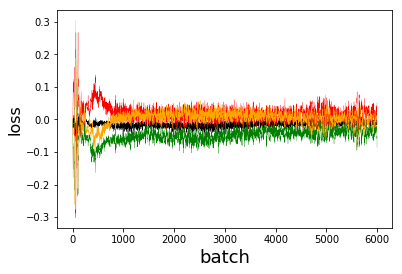

In [12]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

# plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()

In [13]:
def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

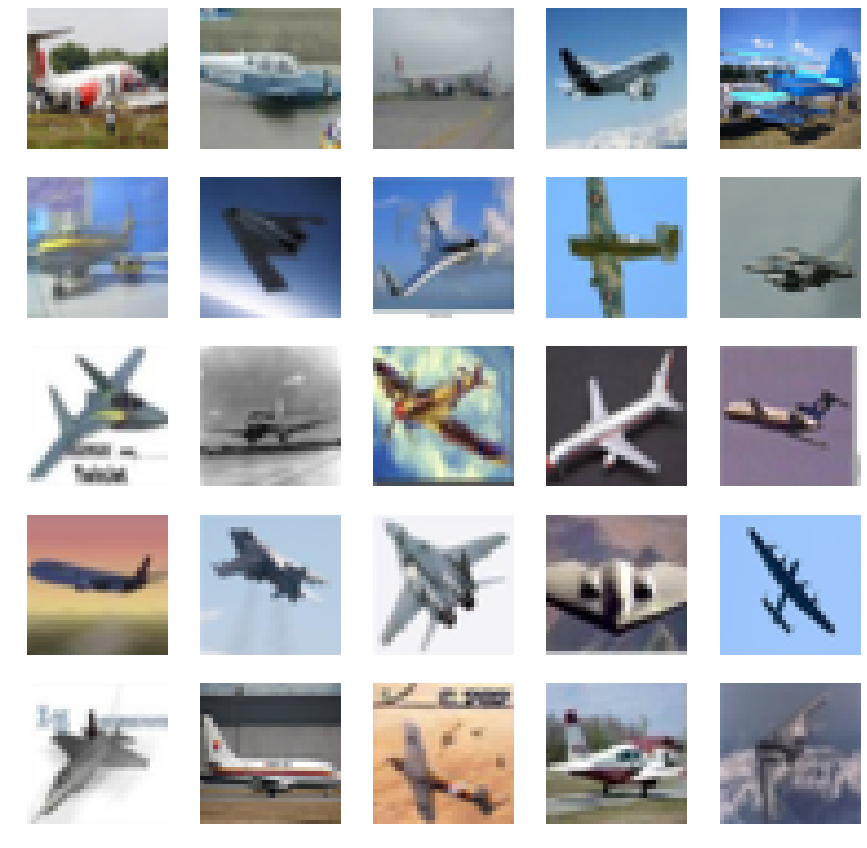

In [14]:
r, c = 5, 5

idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
true_imgs = (x_train[idx] + 1) *0.5

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(true_imgs[cnt], cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/real.png"))
plt.show()

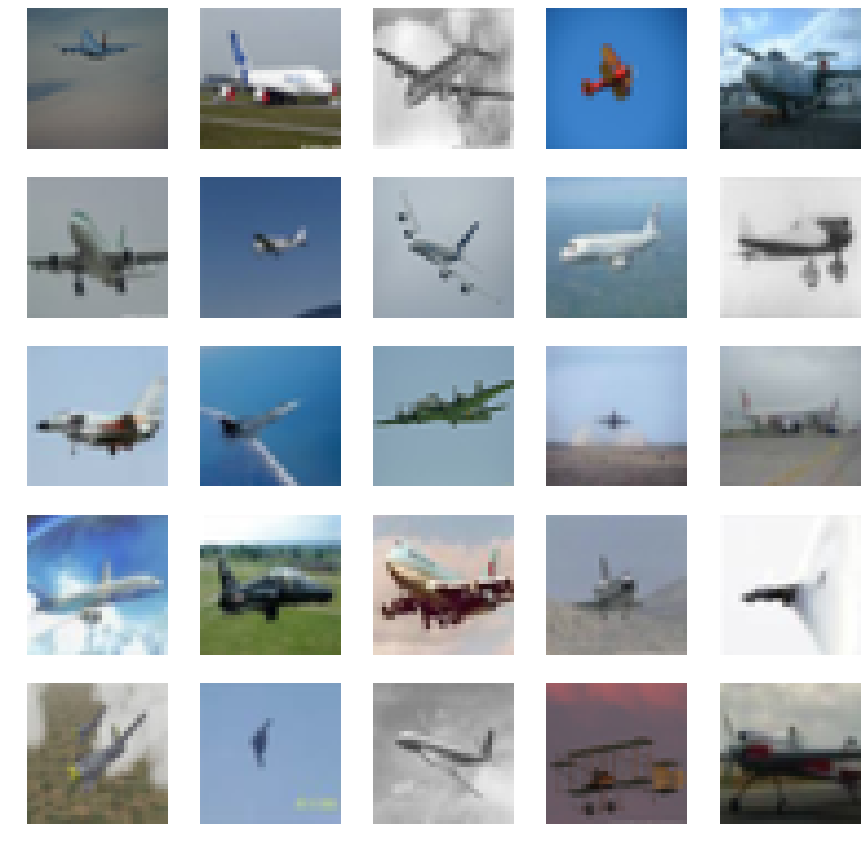

In [15]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

#Rescale images 0 - 1

gen_imgs = 0.5 * (gen_imgs + 1)
# gen_imgs = np.clip(gen_imgs, 0, 1)

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]), cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/sample.png"))
plt.close()


fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        c_diff = 99999
        c_img = None
        for k_idx, k in enumerate((x_train + 1) * 0.5):
            
            diff = compare_images(gen_imgs[cnt, :,:,:], k)
            if diff < c_diff:
                c_img = np.copy(k)
                c_diff = diff
        axs[i,j].imshow(c_img, cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1

fig.savefig(os.path.join(RUN_FOLDER, "images/sample_closest.png"))
plt.show()